<a href="https://colab.research.google.com/github/sachin886x/deep-learning-lab/blob/main/lab3_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== LINEAR DATASET =====


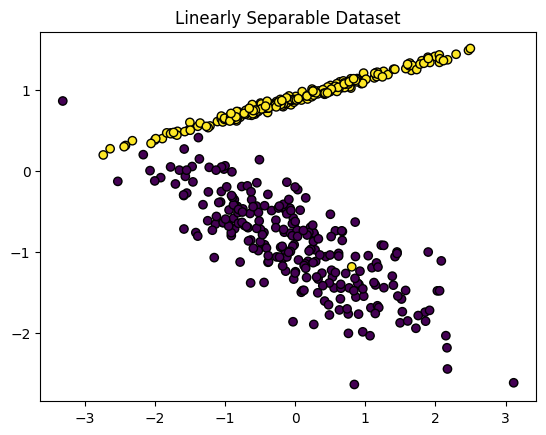

Perceptron Accuracy (Linear): 97.0 %


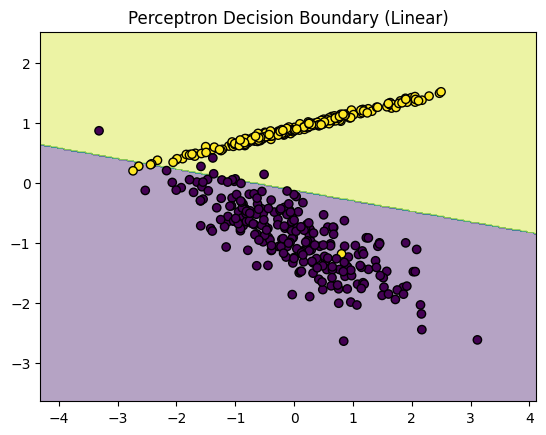


===== NON-LINEAR DATASET =====


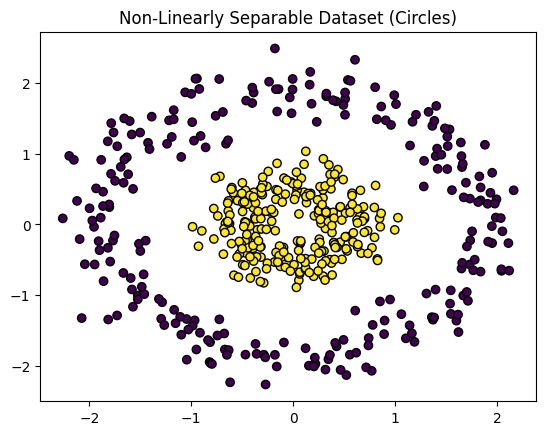

Perceptron Accuracy (Non-Linear): 30.0 %


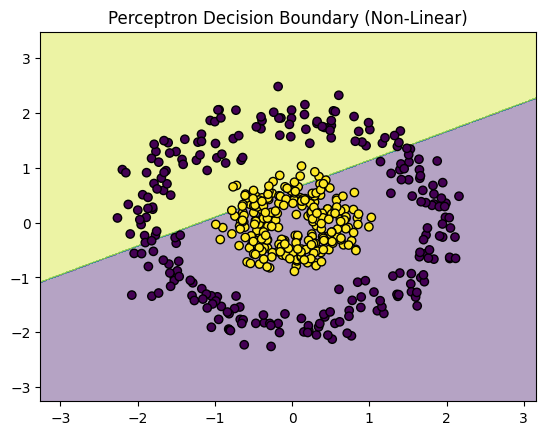

Neural Network Accuracy (Non-Linear): 100.0 %


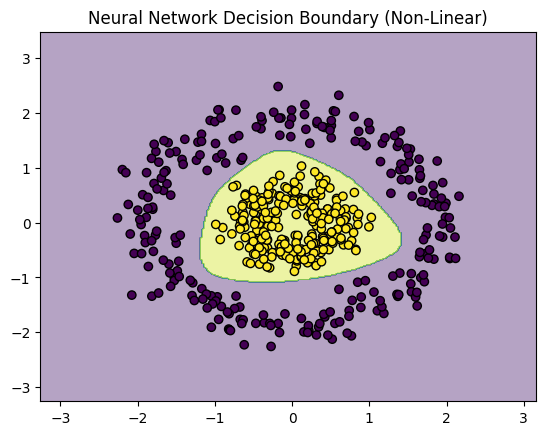

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---------------------------
# Utility functions
# ---------------------------
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

def plot_data(X, y, title="Dataset"):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

def plot_decision_boundary(model_predict, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model_predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# ---------------------------
# Part A: Single Layer Perceptron
# ---------------------------
class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.w) + self.b
                y_pred = 1 if linear_output >= 0 else 0

                update = self.lr * (y[i] - y_pred)
                self.w += update * X[i]
                self.b += update

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)

# ---------------------------
# Part B: Multi Layer Neural Network (1 hidden layer)
# ---------------------------
class SimpleNN:
    def __init__(self, input_size=2, hidden_size=8, lr=0.1, epochs=5000):
        self.lr = lr
        self.epochs = epochs

        # Xavier Initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, 1) * np.sqrt(1 / hidden_size)
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X, y):
        y = y.reshape(-1, 1)

        for _ in range(self.epochs):
            # Forward pass
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.sigmoid(Z1)

            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.sigmoid(Z2)

            # Backpropagation
            error = y - A2
            dA2 = error * self.sigmoid_derivative(A2)

            dW2 = np.dot(A1.T, dA2)
            db2 = np.sum(dA2, axis=0, keepdims=True)

            dA1 = np.dot(dA2, self.W2.T) * self.sigmoid_derivative(A1)
            dW1 = np.dot(X.T, dA1)
            db1 = np.sum(dA1, axis=0, keepdims=True)

            # Gradient descent update
            self.W2 += self.lr * dW2
            self.b2 += self.lr * db2
            self.W1 += self.lr * dW1
            self.b1 += self.lr * db1

    def predict(self, X):
        A1 = self.sigmoid(np.dot(X, self.W1) + self.b1)
        A2 = self.sigmoid(np.dot(A1, self.W2) + self.b2)
        return (A2 >= 0.5).astype(int).flatten()

# ==========================================================
# 1) LINEARLY SEPARABLE DATASET (Perceptron works)
# ==========================================================
X_linear, y_linear = make_classification(
    n_samples=500, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1, class_sep=2, random_state=42
)

scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("\n===== LINEAR DATASET =====")
plot_data(X_linear, y_linear, "Linearly Separable Dataset")

perceptron = Perceptron(lr=0.01, epochs=1000)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
print("Perceptron Accuracy (Linear):", accuracy(y_test, y_pred), "%")

plot_decision_boundary(perceptron.predict, X_linear, y_linear, "Perceptron Decision Boundary (Linear)")

# ==========================================================
# 2) NON-LINEAR DATASET (Perceptron fails)
# ==========================================================
X_nl, y_nl = make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=42)
X_nl = scaler.fit_transform(X_nl)

X_train, X_test, y_train, y_test = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

print("\n===== NON-LINEAR DATASET =====")
plot_data(X_nl, y_nl, "Non-Linearly Separable Dataset (Circles)")

perceptron2 = Perceptron(lr=0.01, epochs=1000)
perceptron2.fit(X_train, y_train)

y_pred2 = perceptron2.predict(X_test)
print("Perceptron Accuracy (Non-Linear):", accuracy(y_test, y_pred2), "%")

plot_decision_boundary(perceptron2.predict, X_nl, y_nl, "Perceptron Decision Boundary (Non-Linear)")

# ==========================================================
# 3) MULTI-LAYER NN solves Non-linear dataset
# ==========================================================
nn = SimpleNN(input_size=2, hidden_size=10, lr=0.1, epochs=5000)
nn.fit(X_train, y_train)

y_pred3 = nn.predict(X_test)
print("Neural Network Accuracy (Non-Linear):", accuracy(y_test, y_pred3), "%")

plot_decision_boundary(nn.predict, X_nl, y_nl, "Neural Network Decision Boundary (Non-Linear)")
